In [120]:
from math import exp, log, sqrt
import re
from datetime import date, time, datetime, timedelta
from operator import itemgetter
import sys
import os
import glob

In [75]:
string = 'The quick brown fox jumps over the lazy dog'

In [7]:
string_list = string.split()
pattern = re.compile(r'The', re.I)

In [10]:
count = 0
for word in string_list:
    if pattern.search(word):
        print(pattern.search(word).group())
        count += 1
print('output: {0: d}'.format(count))

The
the
output:  2


In [11]:
string_to_find = r'The'
pattern2 = re.compile(string_to_find, re.I)
print('Output #40: {:s}'.format(pattern.sub('a', string)))

Output #40: a quick brown fox jumps over a lazy dog


# 日期

In [24]:
today =  date.today()
today

datetime.date(2018, 10, 11)

In [17]:
today.year, today.month, today.day

(2018, 10, 11)

In [18]:
datetime.today()

datetime.datetime(2018, 10, 11, 16, 27, 37, 983991)

In [33]:
one_day = timedelta(days=-1)
yesterday = today + one_day
yesterday

datetime.date(2018, 10, 10)

计算两个日期之间的天数

In [41]:
date_diff = today - yesterday
print('Output: {0!s}'.format(date_diff))
print(str(date_diff).split()[0])

Output: 1 day, 0:00:00
1


# 列表

In [47]:
a_list = [1, 2, 3]
a_list.append(8)
#列表反转
a_list.reverse()
a_list

[8, 3, 2, 1]

In [56]:
#列表排序
a_list.sort()
a_list

[1, 2]

In [59]:
my_lists = [[1, 2, 3, 4], [4, 3, 2, 1], [2, 4, 1, 3]]
my_lists_sorted_by_index_3 = sorted(my_lists, key=lambda x: x[3])
my_lists_sorted_by_index_3

[[4, 3, 2, 1], [2, 4, 1, 3], [1, 2, 3, 4]]

In [63]:
my_lists = [[123, 2, 2, 444], [22, 6, 6, 444], \
            [354, 4, 4, 678], [236, 5, 5, 678], \
            [578, 1, 1, 290], [461, 1, 1, 290]]

my_lists_sorted_by_index_3_and_0 = sorted(my_lists, key=itemgetter(3, 0))
my_lists_sorted_by_index_3_and_0

[[461, 1, 1, 290],
 [578, 1, 1, 290],
 [22, 6, 6, 444],
 [123, 2, 2, 444],
 [236, 5, 5, 678],
 [354, 4, 4, 678]]

# 文件

In [78]:
#一次读取一个文件
input_file = sys.argv[1]
filereader = open(input_file, 'r')
for row in filereader:
    print(row.strip())
filereader.close()


{
"shell_port": 52652,
"iopub_port": 56785,
"stdin_port": 59772,
"control_port": 41365,
"hb_port": 33193,
"ip": "127.0.0.1",
"key": "179ba602-601196ae547262e0abe0b09b",
"transport": "tcp",
"signature_scheme": "hmac-sha256",
"kernel_name": ""
}


In [ ]:
#一次读取多个文件
inputPath = sys.argv[1]
for input_file in glob.glob(os.path.join(inputPath, '*.txt')):
    with open(input_file, 'r', newline='', errors='ignore    ') as filereader:
        for row in filereader:
            print('{}'.format(row))


# 数据库操作

In [79]:
import sqlite3

# 创建SQLite3内存数据库
# 创建带走4个属性的sales表

conn = sqlite3.connect(':memory:')
query = """CREATE TABLE sales
(customer VARCHAR(20),
product VARCHAR(20),
amount FLOAT,
date DATE);"""
conn.execute(query)
conn.commit()

# 在表中插入几行数据
data = [
    ('Bob', 'Notepad', 2.50, '2018-10-01'),
    ('Tom', 'Binder', 4.15, '2018-10-02'),
    ('Lucy', 'Printer', 155.75, '2018-09-28'),
    ('Lily', 'Computer', 679.40, '2018-10-09')
]
statement = "INSERT INTO sales VALUES(?, ?, ?, ?)"
conn.executemany(statement, data)
conn.commit()

# 查询sales表
cursor = conn.execute("SELECT *FROM sales")
rows = cursor.fetchall()

# 计算查询结果中行的数量
row_counter = 0
for row in rows:
    print(row)
    row_counter += 1
print('Number of row: %d' % (row_counter))

('Bob', 'Notepad', 2.5, '2018-10-01')
('Tom', 'Binder', 4.1500000000000004, '2018-10-02')
('Lucy', 'Printer', 155.75, '2018-09-28')
('Lily', 'Computer', 679.39999999999998, '2018-10-09')
Number of row: 4


# 图与图表

In [123]:
import matplotlib.pyplot as plt
plt.style.use=('ggplot')

6.1条形图

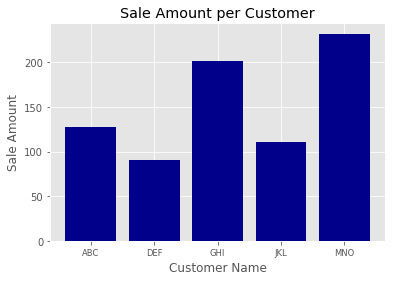

In [125]:
import matplotlib.pyplot as plt
plt.style.use=('ggplot')

customers = ['ABC', 'DEF', 'GHI', 'JKL', 'MNO']
customers_index = range(len(customers))
sale_amounts = [127, 90, 201, 111, 232]

# 创建一个基础图
fig = plt.figure()

# 在基础图上添加一个子图
ax1 = fig.add_subplot(1,1,1)
#ax1 = plt.subplot(111)

# 创建条形图
ax1.bar(customers_index, sale_amounts, align='center', color='darkblue')
# 设置刻度线的位置，在x轴底部和y轴左侧
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')

# 将条形的刻度线标签走客户索引值改为实际的客户名称
plt.xticks(customers_index, customers, rotation=0, fontsize='small')
# 添加标签和标题
plt.xlabel('Customer Name')
plt.ylabel('Sale Amount')
plt.title('Sale Amount per Customer')

# 将统计图保存到当前文件夹, 
# dpi=400设置图形的分辨率 [每英寸(1英寸=2.54厘米)的点数]
# bbox_inches='tight'，表示保存图形时，将图形四周的空白部分去掉
plt.savefig('bar_plot.png', dpi=400, bbox_inches='tight')
plt.show()

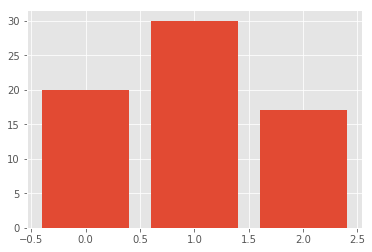

In [99]:
fig = plt.figure()
ax = plt.subplot(111)
ax.bar(range(3), [20, 30, 17])

plt.show()

6.2直方图

/data/data/com.termux/files/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


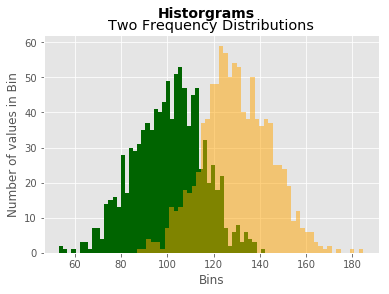

In [126]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use=('ggplot')

mu1, mu2, sigma = 100, 130, 15

# 用随机数创建两个正态分布变量x1, x2
# x1的均值是100, x2的均值是130
x1 = mu1 + sigma*np.random.randn(1000)
x2 = mu2 + sigma*np.random.randn(1000)
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)

# 为这两个变量创建两个柱形图，或称频率分布图
# bins=50，表示每一个变量的值应该分成50份
# normed=False，表示直方图表示的是频率分布，而不是概率密度
n, bins, patches = ax1.hist(x1, bins=50, normed=False, color='darkgreen')
n, bins, patches = ax1.hist(x2, bins=50, normed=False, color='orange', alpha=0.5)
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
plt.xlabel('Bins')
plt.ylabel('Number of values in Bin')
fig.suptitle('Historgrams', fontsize=14, fontweight='bold')
ax1.set_title('Two Frequency Distributions')
plt.savefig('histogram.png', dpi=400, bbox_inches='tight')
plt.show()


In [87]:
# np.random.rand() 生成随机样本，位于(0, 1)之间
# np.random.randn() 从标准的正态分布中返回一个或多个样本值
# np.random.randn(3).cumsum() 累加

6.3折线图

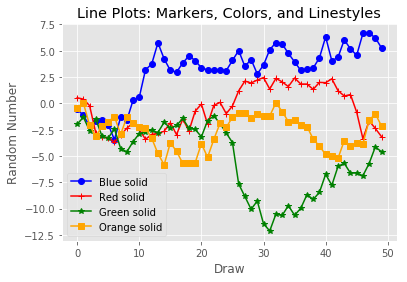

In [118]:
from numpy.random import randn
import matplotlib.pyplot as plt
plt.style.use=('ggplot')

# 生成随机数据
plt_data1 = randn(50).cumsum()
plt_data2 = randn(50).cumsum()
plt_data3 = randn(50).cumsum()
plt_data4 = randn(50).cumsum()

fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(plt_data1, marker=r'o', color=u'blue', linestyle='-', label='Blue solid')
ax1.plot(plt_data2, marker=r'+', color=u'red', linestyle='-', label='Red solid')
ax1.plot(plt_data3, marker=r'*', color=u'green', linestyle='-', label='Green solid')
ax1.plot(plt_data4, marker=r's', color=u'orange', linestyle='-', label='Orange solid')

ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
ax1.set_title('Line Plots: Markers, Colors, and Linestyles')
plt.xlabel('Draw')
plt.ylabel('Random Number')

# loc='best'，根据图中的空白部分将图例放在最合适的地方
plt.legend(loc='best')
plt.savefig('line_plot.png', dpi=400, bbox_inches='tight')
plt.show()

6.4散点图

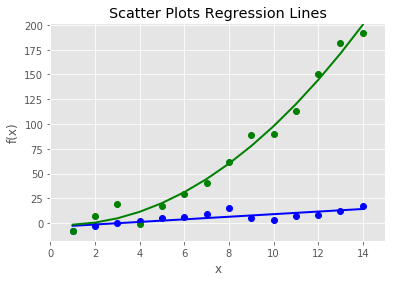

In [142]:
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use=('ggplot')

x = np.arange(start=1., stop=15., step=1.)

# 通过随机数使数据与一条直线和一条二次曲线稍稍偏离
y_linear = x + 5. * np.random.randn(14)
y_quadratic = x**2. + 10. * np.random.randn(14)

# 通过numpy的polyfit函数通过两组数据点(x, y_linear)和(x, y_quadratic)
# 拟合出一条直线和一条二次曲线，再使用poly1d函数
# 根据直线和二次曲线的参数生成一个线性方程和二次方程。
fn_linear = np.poly1d(np.polyfit(x, y_linear, deg=1))
fn_quadratic = np.poly1d(np.polyfit(x, y_quadratic, deg=2))

# 创建带走两条回归曲线的散点图，
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(x, y_linear, 'bo', x, y_quadratic, 'go', \
        x, fn_linear(x), 'b-', x, fn_quadratic(x), 'g-', linewidth=2)

ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
#fig.suptitle('Scatter Plots Regression Lines')
ax1.set_title('Scatter Plots Regression Lines')
plt.xlabel('x')
plt.ylabel('f(x)')

# 设置x轴和y轴的范围
plt.xlim((min(x)-1., max(x)+1))
plt.ylim((min(y_quadratic)-10., max(y_quadratic)+10.))
plt.savefig('scatter_plot.png', dpi=400, bbox_inches='tight')
plt.show()

# ggplot

In [143]:
from ggplot import *
print(mtcars.head())

ModuleNotFoundError: No module named 'ggplot'

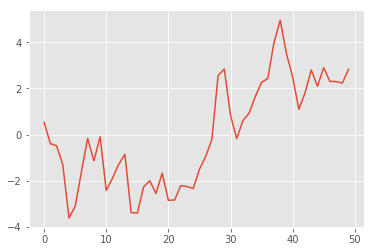

In [85]:
plt.plot(plt_data1)

In [34]:
x1

array([  93.21848124,   89.97503324,   85.82321611,   87.12194065,
        112.90786019,   85.1894732 ,  117.59673905,  100.66628364,
         68.58372151,  110.69256139,   95.5027504 ,  132.85793819,
        103.70684016,  126.44892118,  107.30811199,   83.02689536,
        133.85474326,   89.02180173,   90.54446655,   93.98524811,
        101.42204989,   89.61293788,   95.2447926 ,  125.82497004,
        112.68241798,  105.98599227,  120.16513341,  111.7933967 ,
        106.1889681 ,   97.58730105,  121.1218731 ,  116.17338074,
         99.80339994,  109.01162649,   89.21587556,   83.09382435,
         84.81199004,  109.30289864,  101.32549432,   91.29922093,
        115.98698037,   96.7080097 ,  119.34851033,  100.62573707,
         95.20892681,  106.53600788,   87.72193776,  118.12569476,
        123.03600345,  127.65186859,  110.76355869,  102.65010058,
         97.03560535,   95.89841089,  115.27125048,   86.11908507,
        115.31392586,  104.19094478,   99.73346403,   93.11639

<BarContainer object of 10 artists>

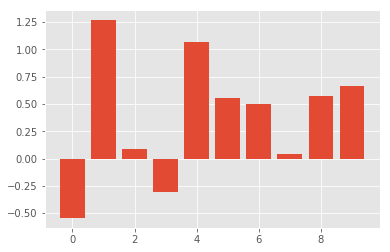

In [24]:
np.random.randn(10)
plt.bar(range(10), np.random.randn(10))